In [87]:
#INSTALLATION INSTRUCTIONS
#Please make sure the device has the factor analyzer module installed in 
#order to run by running the below command if necessary, along with skicit learn and pandas 
#!pip install factor-analyzer

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Data Cleansing

In the dataset provided we have the following overarching categories: 
<br>


| Category | Sub-Categories |
| --- | --- |
|Music preferences|19|
|Movie preferences|12|
|Hobbies & interests|32|
|Phobias|10|
|Health habits|3|
|Personality traits, views on life, & opinions|57|
|Spending habits|7|
|Demographics|10|

This project will use the features: Music, Movies, Hobbies, Phobias, Health and Demographic. Using this, the project aims to predict the personality traits, views on life and opinions. However, as these are umberella cateogies, there are a large number of features. 

Firstly, all blank values in the filled with the average of the respective feature

In order to reduce the number of sub-features, within each category a correlation matrix is used to find strongly correlated features which are then dropped from the dataframe.

In the personality traits category, the project will only aim to predict a select few of the traits provided in the data namely: 'Workaholism', 'Thinking ahead', 'Final judgement', 'Reliability','Keeping promises', 'Funniness', 'Decision making', 'Self-criticism', 'Judgment calls', 'Empathy', 'Giving', 'Loneliness', 'Mood swings','Socializing', 'Assertiveness', 'Happiness in life', 'Energy levels','Personality'

In [2]:
df = pd.read_csv("data/responses.csv") 

# Fill empty cells with average values of the column
for column in df.columns: 
    if(df[column].dtypes!=object ):
        avg = round(df[column].mean(),0)
        df[column] = df[column].fillna(avg)

#drop non-integer columns
for column in df.columns:
    if(df[column].dtypes==object ):
        df = df.drop(column, 1)
        

In [3]:

traindf = df.iloc[0:890]
validatedf = df.iloc[890:950]
testdf = df.iloc[950:1010]
print(df.shape)
print(traindf.shape)
print(validatedf.shape)
print(testdf.shape)


(1010, 139)
(890, 139)
(60, 139)
(60, 139)


In [4]:
musicdf = traindf.iloc[:, : 19]
moviedf = traindf.iloc[:, 19 : 31]
hobbiesdf = traindf.iloc[:, 31 : 63]
phobiadf =traindf.iloc[:, 64 : 73]
healthdf =traindf.iloc[:, 73 : 74]
personalitydf = traindf.iloc[:, 74 :128]
spendingdf = traindf.iloc[:, 128 :135]
demodf = traindf.iloc[:, 135:]


In [5]:
plt.figure(figsize=(12,10))
cor = musicdf.corr().abs()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
triangle = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
music_to_drop = [column for column in triangle.columns if any(triangle[column] > 0.35)]
print(music_to_drop)

['Country', 'Classical music', 'Musical', 'Pop', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera']


In [6]:
plt.figure(figsize=(12,10))
cor = moviedf.corr().abs()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
triangle = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
movies_to_drop = [column for column in triangle.columns if any(triangle[column] > 0.35)]
print(movies_to_drop)

['Thriller', 'Animated', 'Western']


In [7]:
plt.figure(figsize=(15,12))
cor = hobbiesdf.corr().abs()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
triangle = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
hobbies_to_drop = [column for column in triangle.columns if any(triangle[column] > 0.35)]
print(hobbies_to_drop)

['Politics', 'Physics', 'PC', 'Chemistry', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Writing', 'Shopping', 'Science and technology', 'Theatre', 'Adrenaline sports']


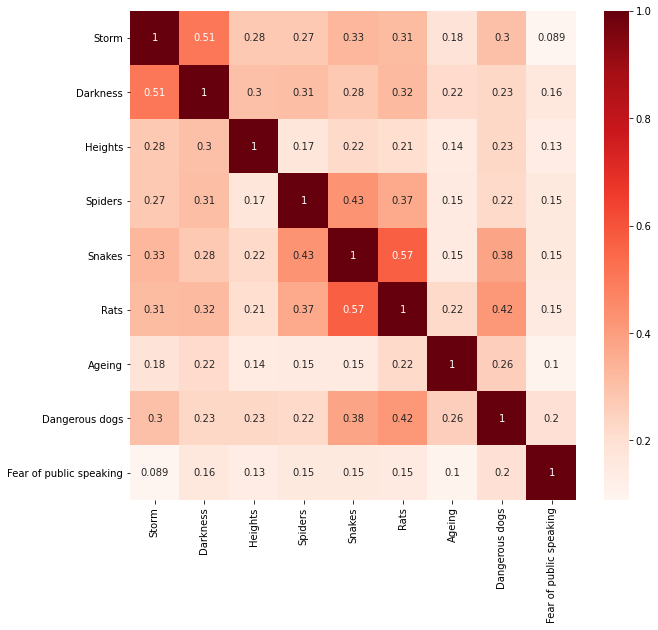

['Darkness', 'Snakes', 'Rats', 'Dangerous dogs']


In [86]:
plt.figure(figsize=(10,9))
cor = phobiadf.corr().abs()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
triangle = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
phobias_to_drop = [column for column in triangle.columns if any(triangle[column] > 0.35)]
print(phobias_to_drop)

## Removing relevant aspects

In [9]:
traindf = traindf.drop(['Country', 'Pop', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera'], 1)
traindf = traindf.drop(['Thriller', 'Animated', 'Western', 'Action'], 1)
traindf = traindf.drop(['Politics', 'Physics', 'PC', 'Chemistry', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Shopping', 'Science and technology', 'Theatre', 'Adrenaline sports'], 1)
traindf = traindf.drop(['Darkness', 'Snakes', 'Rats', 'Dangerous dogs'], 1)

testdf = testdf.drop(['Country', 'Pop', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera'], 1)
testdf = testdf.drop(['Thriller', 'Animated', 'Western', 'Action'], 1)
testdf = testdf.drop(['Politics', 'Physics', 'PC', 'Chemistry', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Shopping', 'Science and technology', 'Theatre', 'Adrenaline sports'], 1)
testdf = testdf.drop(['Darkness', 'Snakes', 'Rats', 'Dangerous dogs'], 1)

validatedf = validatedf.drop(['Country', 'Pop', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera'], 1)
validatedf = validatedf.drop(['Thriller', 'Animated', 'Western', 'Action'], 1)
validatedf = validatedf.drop(['Politics', 'Physics', 'PC', 'Chemistry', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Shopping', 'Science and technology', 'Theatre', 'Adrenaline sports'], 1)
validatedf = validatedf.drop(['Darkness', 'Snakes', 'Rats', 'Dangerous dogs'], 1)


In [10]:
traindf = traindf.drop(['Finances','Shopping centres', 'Branded clothing', 'Entertainment spending', 
              'Spending on looks', 'Spending on gadgets','Spending on healthy eating'],1)

testdf = testdf.drop(['Finances','Shopping centres', 'Branded clothing', 'Entertainment spending', 
              'Spending on looks', 'Spending on gadgets','Spending on healthy eating'],1)

validatedf = validatedf.drop(['Finances','Shopping centres', 'Branded clothing', 'Entertainment spending', 
              'Spending on looks', 'Spending on gadgets','Spending on healthy eating'],1)

In [11]:
traindf = traindf.drop(['Healthy eating','Age','Height', 'Weight', 'Number of siblings'],1)
testdf = testdf.drop(['Healthy eating','Age','Height', 'Weight', 'Number of siblings'],1)
validatedf = validatedf.drop(['Healthy eating','Age','Height', 'Weight', 'Number of siblings'],1)

In [12]:
print(traindf.shape)
print(testdf.shape)
print(validatedf.shape)

(890, 94)
(60, 94)
(60, 94)


# KMeans Clustering and Factor Analyzer



In [13]:
personalitydf_new = traindf.iloc[:, 50 :94]


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
score_arr = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(personalitydf_new)
    score_arr.append(kmeans.inertia_)
    

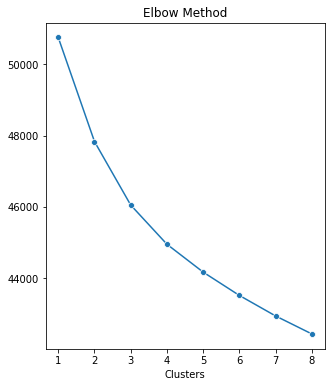

In [15]:
plt.figure(figsize=(5,6))
sns.lineplot(range(1, 9), score_arr,marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.show()

Number of clusters = 4

In [16]:
from factor_analyzer import FactorAnalyzer        
analyzer = FactorAnalyzer(4, rotation=None)
analyzer.fit(personalitydf_new)
factors = analyzer.loadings_
factor_scores = pd.DataFrame(factors)
factor_scores.index = personalitydf_new.columns
factor_scores

,0,1,2,3
Funniness,0.167821,-0.005083,0.274827,0.181067
Fake,-0.254396,-0.137260,0.270315,0.245292
Criminal damage,-0.093566,-0.117696,0.411203,-0.135147
Decision making,-0.275286,0.229482,-0.118628,-0.018927
Elections,0.082155,0.152290,-0.069917,0.179510
Self-criticism,-0.273213,0.206429,0.115026,0.316725
Judgment calls,0.079014,0.170187,0.116773,0.089002
Hypochondria,-0.250599,0.151923,0.149284,-0.018892
Empathy,-0.031316,0.332806,-0.066468,-0.020268
Eating to survive,-0.134510,-0.014967,0.088271,0.090479


In [17]:
factors = factor_scores.unstack()
factors = pd.DataFrame(factors).reset_index()
factors.columns=["Cluster","Trait","Scores"]
factors = factors.sort_values(['Cluster',"Scores"]).groupby('Cluster').head(3)    
# factors

Based on the scores above, the below represent the most suitable for each trait. Not that scores above may vary on run and those on the initial run are selected for the project

| Cluster | 0 | 1 | 2 | 3 |
| --- | --- | --- | --- | --- |
||Personality|Reliability|Self-criticism|Empathy	
||Socializing|Keeping promises|Mood swings|Giving
||Happiness in life|Energy Levels|Lonliness|Socializing


Based on the theory there are 5 personality traits: Openness, Conscientiousness, Agreeableness, Extraversion, and Neuroticism. Our data will only focus on 4 based on the number of clusters formed. 

0: Extraversion <br>
1: Conscientiousness <br>
2: Neuroticism<br>
3: Agreeableness

Based on the table above, there are 11 unique traits. The project will now focus on predicting these traits. 

# Model Selection

In [18]:
traits_train = traindf.drop(["Happiness in life","Personality","Reliability","Self-criticism", "Empathy",
                       "Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness" ],1)

traits_val = validatedf.drop(["Happiness in life","Personality","Reliability","Self-criticism", "Empathy", 
                       "Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness" ],1)


knn_traindf = traits_train
knn_validatedf = traits_val

svm_traindf = traits_train
svm_validatedf = traits_val

log_traindf = traits_train
log_validatedf = traits_val

In [19]:
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

y_all = [i for i in log_traindf.iloc[:, log_traindf.columns.get_loc("Socializing")]]
responses_train = log_traindf.drop(["Socializing", ], axis=1)
x_all = responses_train.iloc[:, :].values

test = SelectKBest(score_func=chi2, k=15)
features = test.fit_transform(x_all, y_all)
# print(features.shape)
x_all=features


In [20]:
y_val = [i for i in log_validatedf.iloc[:, log_validatedf.columns.get_loc("Socializing")]]
responses_val = log_validatedf.drop(["Socializing",], axis=1)
x_val = responses_val.iloc[:, :].values
x_val = test.transform(x_val)

# KNeighborsClassifier

In [21]:
model = KNeighborsClassifier()
model = model.fit(x_all, y_all)
pred_val = model.predict(x_val)

print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  55.00000000000001 %


# SVM

In [22]:
model = SVC()
model =model.fit(x_all, y_all)
pred_val = model.predict(x_val)

print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  51.66666666666667 %


# Logistic Regression 

In [23]:
model = LogisticRegression(max_iter=800)
model =model.fit(x_all, y_all)
pred_val = model.predict(x_val)

print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  53.333333333333336 %


### Solver Exploration (Logistic Regression, Trait: Socializing)


In [24]:
#prints out accuracy for each trait with respect to each solver in Logistic Regression 
import time
def getAccuracy():
    maxIter = [800]
    solver= ['lbfgs', 'sag', 'saga','liblinear','newton-cg']
    for s in solver: 
        start = time.process_time()

        model = LogisticRegression()
        params = dict(solver=[s], max_iter=maxIter)
        grid_search =  GridSearchCV(estimator=model, param_grid=params)
        model = grid_search.fit(x_all, y_all)
        
        pred_val = model.predict(x_val)
        print("Solver:   ",s)
        print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")
        print("Time:     ",time.process_time() - start)

In [25]:
print("----Socializing----")
getAccuracy()

----Socializing----
Solver:    lbfgs
Accuracy:  53.333333333333336 %
Time:      1.0102279999999997
Solver:    sag
Accuracy:  53.333333333333336 %
Time:      0.7830770000000005
Solver:    saga
Accuracy:  53.333333333333336 %
Time:      1.544663
Solver:    liblinear
Accuracy:  55.00000000000001 %
Time:      0.07835500000000017
Solver:    newton-cg
Accuracy:  53.333333333333336 %
Time:      0.552192999999999


In [26]:
log_traindf=traindf
log_validatedf = validatedf


# Model Exploration - for each trait

In [27]:
#prints out accuracy for each trait using each model  
traits = ["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy", "Personality" ]
for trait in traits:
    arr = ["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy" , "Personality"]
    arr.remove(trait)
    log_traindf= traindf.drop(arr,1)
    log_validatedf = validatedf.drop(arr,1)

    y_all = [i for i in log_traindf.iloc[:, log_traindf.columns.get_loc(trait)]]
    responses_train = log_traindf.drop([trait, ], axis=1)
    x_all = responses_train.iloc[:, :].values

    test = SelectKBest(score_func=chi2, k=15)
    features = test.fit_transform(x_all, y_all)
    # print(features.shape)
    x_all=features
    
    y_val = [i for i in log_validatedf.iloc[:, log_traindf.columns.get_loc(trait)]]
    responses_val = log_validatedf.drop([trait], axis=1)
    x_val = responses_val.iloc[:, :].values
    x_val = test.transform(x_val)

    model_log = LogisticRegression(max_iter=800)
    model_log =model_log.fit(x_all, y_all)
    pred_val = model_log.predict(x_val)
    print("----",trait,"----")
    print("LOG",accuracy_score(y_val, pred_val)*100, "%")
    
    model_knn = KNeighborsClassifier()
    model_knn =model_knn.fit(x_all, y_all)
    pred_val = model_knn.predict(x_val)
   
    print("KNN",accuracy_score(y_val, pred_val)*100, "%")
   
    model_svc = SVC()
    model_svc =model_svc.fit(x_all, y_all)
    pred_val = model_svc.predict(x_val)
   
    print("SVC",accuracy_score(y_val, pred_val)*100, "%")
   
    

---- Happiness in life ----
LOG 70.0 %
KNN 60.0 %
SVC 65.0 %
---- Reliability ----
LOG 28.333333333333332 %
KNN 50.0 %
SVC 33.33333333333333 %
---- Self-criticism ----
LOG 35.0 %
KNN 33.33333333333333 %
SVC 48.333333333333336 %
---- Socializing ----
LOG 53.333333333333336 %
KNN 55.00000000000001 %
SVC 51.66666666666667 %
---- Keeping promises ----
LOG 45.0 %
KNN 51.66666666666667 %
SVC 50.0 %
---- Mood swings ----
LOG 48.333333333333336 %
KNN 48.333333333333336 %
SVC 55.00000000000001 %
---- Giving ----
LOG 45.0 %
KNN 26.666666666666668 %
SVC 36.666666666666664 %
---- Energy levels ----
LOG 46.666666666666664 %
KNN 40.0 %
SVC 45.0 %
---- Loneliness ----
LOG 53.333333333333336 %
KNN 48.333333333333336 %
SVC 58.333333333333336 %
---- Empathy ----
LOG 36.666666666666664 %
KNN 45.0 %
SVC 43.333333333333336 %
---- Personality ----
LOG 65.0 %
KNN 60.0 %
SVC 66.66666666666666 %


To further customise, based on the above results different models have been chosen to predict different traits so that the accuracy is higher.

|Logistic Regression|KNN|SVC|
|---|---|---|
|Happiness in life|Reliability|Self-criticism|
|Energy levels|Socializing|Mood swings|
|Giving|Keeping promises |Loneliness|
||Empathy|Personality|




### Solver Exploration (Logistic Regression)


The below analysis is done to get an idea about how changing the solver impacts the accuracy. While the difference is minute in the below results, there is still a variation and therefore the most accurate solver for each trait is chosen. Furthermore, some solvers appear to be unable to converge 

In [28]:
traits_log= ["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy", "Personality" ]
# traits_log= ["Happiness in life", "Giving", "Energy levels" ]

for trait in traits_log:
    arr= ["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy", "Personality" ]
    warnings.filterwarnings("ignore", category=UserWarning)
    arr.remove(trait)
    log_traindf= traindf.drop(arr,1)
    log_validatedf = validatedf.drop(arr,1)

    y_all = [i for i in log_traindf.iloc[:, log_traindf.columns.get_loc(trait)]]
    responses_train = log_traindf.drop([trait, ], axis=1)
    x_all = responses_train.iloc[:, :].values
    
    test = SelectKBest(score_func=chi2, k=15)
    features = test.fit_transform(x_all, y_all)
    # print(features.shape)
    x_all=features
    
    y_val = [i for i in log_validatedf.iloc[:, log_validatedf.columns.get_loc(trait)]]
    responses_val = log_validatedf.drop([trait], axis=1)
    x_val = responses_val.iloc[:, :].values
    x_val = test.transform(x_val)


    model = LogisticRegression(max_iter=800)
    model = model.fit(x_all, y_all)
    pred_val = model.predict(x_val)
    print("----", trait,"----")
    getAccuracy()

#     print("Time:     ",time.process_time() - start)

---- Happiness in life ----
Solver:    lbfgs
Accuracy:  70.0 %
Time:      1.447300000000002
Solver:    sag
Accuracy:  70.0 %
Time:      1.4959999999999987
Solver:    saga
Accuracy:  70.0 %
Time:      1.6754369999999987
Solver:    liblinear
Accuracy:  71.66666666666667 %
Time:      0.06448899999999824
Solver:    newton-cg
Accuracy:  70.0 %
Time:      0.8226499999999994
---- Reliability ----
Solver:    lbfgs
Accuracy:  28.333333333333332 %
Time:      1.7724960000000003
Solver:    sag
Accuracy:  28.333333333333332 %
Time:      0.5488740000000014
Solver:    saga
Accuracy:  28.333333333333332 %
Time:      0.9262660000000018
Solver:    liblinear
Accuracy:  28.333333333333332 %
Time:      0.07294100000000014
Solver:    newton-cg
Accuracy:  28.333333333333332 %
Time:      0.7997329999999963
---- Self-criticism ----
Solver:    lbfgs
Accuracy:  35.0 %
Time:      1.0422199999999968
Solver:    sag
Accuracy:  35.0 %
Time:      0.7561999999999962
Solver:    saga
Accuracy:  35.0 %
Time:      1.539197

### Kernel Exploration (SVC)


In [29]:
# traits_log= ["Reliability", "Socializing", "Keeping promises", "Empathy" ]
traits_log = ["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy", "Personality" ]
kernels = ['linear',  'rbf', 'sigmoid']
for trait in traits_log:
    arr= ["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy", "Personality" ]
    arr.remove(trait)
    log_traindf= traindf.drop(arr,1)
    log_validatedf = validatedf.drop(arr,1)

    y_all = [i for i in log_traindf.iloc[:, log_traindf.columns.get_loc(trait)]]
    responses_train = log_traindf.drop([trait, ], axis=1)
    x_all = responses_train.iloc[:, :].values
    
    test = SelectKBest(score_func=chi2, k=15)
    features = test.fit_transform(x_all, y_all)
    # print(features.shape)
    x_all=features
    
    y_val = [i for i in log_validatedf.iloc[:, log_validatedf.columns.get_loc(trait)]]
    responses_val = log_validatedf.drop([trait], axis=1)
    x_val = responses_val.iloc[:, :].values
    x_val = test.transform(x_val)
    print("----", trait,"----")
    for k in kernels:
        model = SVC(kernel=k)
        model = model.fit(x_all, y_all)
        pred_val = model.predict(x_val)
       
        print("Kernel: ",k)
        print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")


---- Happiness in life ----
Kernel:  linear
Accuracy:  60.0 %
Kernel:  rbf
Accuracy:  65.0 %
Kernel:  sigmoid
Accuracy:  60.0 %
---- Reliability ----
Kernel:  linear
Accuracy:  30.0 %
Kernel:  rbf
Accuracy:  33.33333333333333 %
Kernel:  sigmoid
Accuracy:  36.666666666666664 %
---- Self-criticism ----
Kernel:  linear
Accuracy:  38.333333333333336 %
Kernel:  rbf
Accuracy:  48.333333333333336 %
Kernel:  sigmoid
Accuracy:  20.0 %
---- Socializing ----
Kernel:  linear
Accuracy:  58.333333333333336 %
Kernel:  rbf
Accuracy:  51.66666666666667 %
Kernel:  sigmoid
Accuracy:  51.66666666666667 %
---- Keeping promises ----
Kernel:  linear
Accuracy:  53.333333333333336 %
Kernel:  rbf
Accuracy:  50.0 %
Kernel:  sigmoid
Accuracy:  58.333333333333336 %
---- Mood swings ----
Kernel:  linear
Accuracy:  51.66666666666667 %
Kernel:  rbf
Accuracy:  55.00000000000001 %
Kernel:  sigmoid
Accuracy:  45.0 %
---- Giving ----
Kernel:  linear
Accuracy:  48.333333333333336 %
Kernel:  rbf
Accuracy:  36.6666666666666

### Neighbour Exploration (KNN)


In [30]:
traits_log = ["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy", "Personality" ]
neighbours = [2,3,4,5,6,7]
for trait in traits_log:
    arr=["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy", "Personality" ]
    arr.remove(trait)
    log_traindf= traindf.drop(arr,1)
    log_validatedf = validatedf.drop(arr,1)

    y_all = [i for i in log_traindf.iloc[:, log_traindf.columns.get_loc(trait)]]
    responses_train = log_traindf.drop([trait, ], axis=1)
    x_all = responses_train.iloc[:, :].values
    
    test = SelectKBest(score_func=chi2, k=15)
    features = test.fit_transform(x_all, y_all)
    # print(features.shape)
    x_all=features
    
    y_val = [i for i in log_validatedf.iloc[:, log_validatedf.columns.get_loc(trait)]]
    responses_val = log_validatedf.drop([trait], axis=1)
    x_val = responses_val.iloc[:, :].values
    x_val = test.transform(x_val)
    print("----", trait,"----")
    for n in neighbours:
        model = KNeighborsClassifier(n_neighbors=n)
        model = model.fit(x_all, y_all)
        pred_val = model.predict(x_val)
        
        print("N: ",n,"Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")


---- Happiness in life ----
N:  2 Accuracy:  50.0 %
N:  3 Accuracy:  50.0 %
N:  4 Accuracy:  61.66666666666667 %
N:  5 Accuracy:  60.0 %
N:  6 Accuracy:  58.333333333333336 %
N:  7 Accuracy:  56.666666666666664 %
---- Reliability ----
N:  2 Accuracy:  46.666666666666664 %
N:  3 Accuracy:  40.0 %
N:  4 Accuracy:  45.0 %
N:  5 Accuracy:  50.0 %
N:  6 Accuracy:  45.0 %
N:  7 Accuracy:  40.0 %
---- Self-criticism ----
N:  2 Accuracy:  30.0 %
N:  3 Accuracy:  25.0 %
N:  4 Accuracy:  33.33333333333333 %
N:  5 Accuracy:  33.33333333333333 %
N:  6 Accuracy:  31.666666666666664 %
N:  7 Accuracy:  35.0 %
---- Socializing ----
N:  2 Accuracy:  53.333333333333336 %
N:  3 Accuracy:  58.333333333333336 %
N:  4 Accuracy:  56.666666666666664 %
N:  5 Accuracy:  55.00000000000001 %
N:  6 Accuracy:  55.00000000000001 %
N:  7 Accuracy:  55.00000000000001 %
---- Keeping promises ----
N:  2 Accuracy:  41.66666666666667 %
N:  3 Accuracy:  45.0 %
N:  4 Accuracy:  46.666666666666664 %
N:  5 Accuracy:  51.66666

Based on the above analysis conducted, the following models appear to be the most optimal for each trait. The table below lists the solver (s), number of neighbouts(n) or kernel respectively (k)

|Logistic Regression|KNN|SVC|
|---|---|---|
|Happiness in life(s=liblinear)|Reliability (n=5)|Self-criticism (k=rbf)|
|Energy levels (s=liblinear)|Socializing (n=3)|Mood swings(k=rbf)|
||Empathy(n=5)|Keeping promises (k=sigmoid)|
||Personality(n=6)|Giving(k=linear)|
|||Loneliness(k=rbf)|





# Model Creation - for each trait

In [31]:
def getX_Y(inTrait):
    arr= ["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy", "Personality" ]
    trait = inTrait
    arr.remove(trait)
    log_traindf= traindf.drop(arr,1)
    log_validatedf = validatedf.drop(arr,1)

    y_all = [i for i in log_traindf.iloc[:, log_traindf.columns.get_loc(trait)]]
    responses_train = log_traindf.drop([trait, ], axis=1)
    x_all = responses_train.iloc[:, :].values
    return x_all, y_all

In [32]:
x_all,y_all = getX_Y("Happiness in life")
test_happiness = SelectKBest(score_func=chi2, k=15)
features = test_happiness.fit_transform(x_all, y_all)
x_all=features


model_happiness = LogisticRegression(max_iter=800, solver='liblinear')
model_happiness = model_happiness.fit(x_all, y_all)


In [33]:
x_all,y_all = getX_Y("Reliability")


test_reliability = SelectKBest(score_func=chi2, k=15)
features = test_reliability.fit_transform(x_all, y_all)
x_all=features

model_reliability = KNeighborsClassifier(n_neighbors=5)
model_reliability = model_reliability.fit(x_all, y_all)


In [34]:
x_all,y_all = getX_Y("Self-criticism")

test_criticism = SelectKBest(score_func=chi2, k=15)
features = test_criticism.fit_transform(x_all, y_all)
x_all=features

model_criticism = SVC(kernel='rbf')
model_criticism = model_criticism.fit(x_all, y_all)


In [35]:
x_all,y_all = getX_Y("Socializing")

test_social = SelectKBest(score_func=chi2, k=15)
features = test_social.fit_transform(x_all, y_all)
x_all=features

model_social = KNeighborsClassifier(n_neighbors=3)
model_social = model_social.fit(x_all, y_all)


In [36]:
x_all,y_all = getX_Y("Keeping promises")

test_promises = SelectKBest(score_func=chi2, k=15)
features = test_promises.fit_transform(x_all, y_all)
x_all=features

model_promises = SVC(kernel='sigmoid')
model_promises = model_promises.fit(x_all, y_all)


In [37]:
x_all,y_all = getX_Y("Mood swings")

test_mood = SelectKBest(score_func=chi2, k=15)
features = test_mood.fit_transform(x_all, y_all)
x_all=features

model_mood = SVC(kernel='rbf')
model_mood = model_mood.fit(x_all, y_all)


In [38]:
x_all,y_all = getX_Y("Giving")

test_giving = SelectKBest(score_func=chi2, k=15)
features = test_giving.fit_transform(x_all, y_all)
x_all=features
model_giving = SVC(kernel='linear')
model_giving = model_giving.fit(x_all, y_all)


In [39]:
x_all,y_all = getX_Y("Energy levels")

test_energy = SelectKBest(score_func=chi2, k=15)
features = test_energy.fit_transform(x_all, y_all)
x_all=features

model_energy = LogisticRegression(max_iter=800, solver='liblinear')
model_energy = model_energy.fit(x_all, y_all)


In [40]:
x_all,y_all = getX_Y("Loneliness")

test_loneliness = SelectKBest(score_func=chi2, k=15)
features = test_loneliness.fit_transform(x_all, y_all)
x_all=features

model_loneliness = SVC(kernel='linear')
model_loneliness = model_loneliness.fit(x_all, y_all)


In [41]:
x_all,y_all = getX_Y("Empathy")

test_empathy = SelectKBest(score_func=chi2, k=15)
features = test_empathy.fit_transform(x_all, y_all)
x_all=features

model_empathy = KNeighborsClassifier(n_neighbors=5)
model_empathy = model_empathy.fit(x_all, y_all)


In [42]:
x_all,y_all = getX_Y("Personality")

test_personality = SelectKBest(score_func=chi2, k=15)
features = test_personality.fit_transform(x_all, y_all)
x_all=features


model_personality = KNeighborsClassifier(n_neighbors=6)
model_personality = model_personality.fit(x_all, y_all)


# Validation

In [43]:
def getXY_val(inTrait):
    arr= ["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy", "Personality" ]
    trait = inTrait
    arr.remove(trait)
    log_traindf= traindf.drop(arr,1)
    log_validatedf = validatedf.drop(arr,1)

    y_val = [i for i in log_validatedf.iloc[:, log_traindf.columns.get_loc(trait)]]
    responses_val = log_validatedf.drop([trait], axis=1)
    x_val = responses_val.iloc[:, :].values
    
    return x_val, y_val
    
    

In [44]:
cols= ["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy", "Personality" ]

preds = pd.DataFrame(columns =cols)
actual = pd.DataFrame(columns =cols)
accuracy = pd.DataFrame(columns =cols)


In [45]:
x_val, y_val = getXY_val("Empathy")
x_val = test_empathy.transform(x_val)
pred_val = model_empathy.predict(x_val)

preds["Empathy"] = pred_val
actual["Empathy"] = y_val
accuracy.loc[0, 'Empathy'] = accuracy_score(y_val, pred_val)*100
print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  45.0 %


In [46]:
x_val, y_val = getXY_val("Giving")
x_val = test_giving.transform(x_val)
pred_val = model_giving.predict(x_val)
preds["Giving"] = pred_val
actual["Giving"] = y_val
accuracy.loc[0, 'Giving'] = accuracy_score(y_val, pred_val)*100

print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  48.333333333333336 %


In [47]:
x_val, y_val = getXY_val("Socializing")
x_val = test_social.transform(x_val)
pred_val = model_social.predict(x_val)
preds["Socializing"] = pred_val
actual["Socializing"] = y_val
accuracy.loc[0, 'Socializing'] = accuracy_score(y_val, pred_val)*100

print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  58.333333333333336 %


In [48]:
x_val, y_val = getXY_val("Self-criticism")
x_val = test_criticism.transform(x_val)

pred_val = model_criticism.predict(x_val)
preds["Self-criticism"] = pred_val
actual["Self-criticism"] = y_val
accuracy.loc[0, 'Self-criticism'] = accuracy_score(y_val, pred_val)*100

print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  48.333333333333336 %


In [49]:
x_val, y_val = getXY_val("Mood swings")
x_val = test_mood.transform(x_val)

pred_val = model_mood.predict(x_val)
preds["Mood swings"] = pred_val
actual["Mood swings"] = y_val
accuracy.loc[0, 'Mood swings'] = accuracy_score(y_val, pred_val)*100

print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  55.00000000000001 %


In [50]:
x_val, y_val = getXY_val("Loneliness")
x_val = test_loneliness.transform(x_val)

pred_val = model_loneliness.predict(x_val)
preds["Loneliness"] = pred_val
actual["Loneliness"] = y_val
accuracy.loc[0, 'Loneliness'] = accuracy_score(y_val, pred_val)*100

print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  53.333333333333336 %


In [51]:
x_val, y_val = getXY_val("Reliability")
x_val = test_reliability.transform(x_val)

pred_val = model_reliability.predict(x_val)
preds["Reliability"] = pred_val
actual["Reliability"] = y_val
accuracy.loc[0, 'Reliability'] = accuracy_score(y_val, pred_val)*100

print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  50.0 %


In [52]:
x_val, y_val = getXY_val("Keeping promises")
x_val = test_promises.transform(x_val)

pred_val = model_promises.predict(x_val)
preds["Keeping promises"] = pred_val
actual["Keeping promises"] = y_val
accuracy.loc[0, 'Keeping promises'] = accuracy_score(y_val, pred_val)*100

print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  58.333333333333336 %


In [53]:
x_val, y_val = getXY_val("Energy levels")
x_val = test_energy.transform(x_val)
pred_val = model_energy.predict(x_val)
preds["Energy levels"] = pred_val
actual["Energy levels"] = y_val
accuracy.loc[0, 'Energy levels'] = accuracy_score(y_val, pred_val)*100
print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  51.66666666666667 %


In [54]:
x_val, y_val = getXY_val("Personality")
x_val = test_personality.transform(x_val)
pred_val = model_personality.predict(x_val)
preds["Personality"] = pred_val
actual["Personality"] = y_val
accuracy.loc[0, 'Personality'] = accuracy_score(y_val, pred_val)*100
print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  68.33333333333333 %


In [55]:
x_val, y_val = getXY_val("Happiness in life")
x_val = test_happiness.transform(x_val)
pred_val = model_happiness.predict(x_val)
preds["Happiness in life"] = pred_val
actual["Happiness in life"] = y_val
accuracy.loc[0, 'Happiness in life'] = accuracy_score(y_val, pred_val)*100
print("Accuracy: ",accuracy_score(y_val, pred_val)*100, "%")

Accuracy:  71.66666666666667 %


In [56]:
preds['Agreeableness_score']=''
preds['Neuroticism_score']=''
preds['Conscientiousness_score']=''
preds['Extraversion_score']=''


In [57]:
for index, row in preds.iterrows():
    sum_agreeableness = row['Empathy']+ row['Giving']+ row['Socializing']
    preds.loc[index, 'Agreeableness_score'] = sum_agreeableness
    sum_neuroticism = row['Self-criticism']+ row['Mood swings']+ row['Loneliness']
    preds.loc[index, 'Neuroticism_score'] = sum_neuroticism
    sum_conscientiousness = row['Reliability']+ row['Keeping promises']+ row['Energy levels']
    preds.loc[index, 'Conscientiousness_score'] = sum_conscientiousness
    sum_extraversion = row['Happiness in life']+ row['Personality']+ row['Socializing']
    preds.loc[index, 'Extraversion_score'] = sum_extraversion


In [58]:
preds['type']=''

In [59]:

for index, row in preds.iterrows():
    finalType = []
    max_score = max(preds['Extraversion_score'][index],preds['Conscientiousness_score'][index],
                 preds['Neuroticism_score'][index],preds['Agreeableness_score'][index]   )
    if ( preds['Extraversion_score'][index] == max_score):
        finalType.append("Extraversion")
    if ( preds['Conscientiousness_score'][index] == max_score):
         finalType.append("Conscientiousness")
    if ( preds['Neuroticism_score'][index] == max_score):
        finalType.append("Neuroticism")
    if ( preds['Agreeableness_score'][index] == max_score):
         finalType.append("Agreeableness")
    str_prediction = ', '.join(finalType)
    preds.loc[index, 'type'] = str_prediction


In [60]:
preds

,Happiness in life,Reliability,Self-criticism,Socializing,Keeping promises,Mood swings,Giving,Energy levels,Loneliness,Empathy,Personality,Agreeableness_score,Neuroticism_score,Conscientiousness_score,Extraversion_score,type
0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,10,9,12,10,Conscientiousness
1,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,9,9,11,10,Conscientiousness
2,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,10,9,12,10,Conscientiousness
3,4.0,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,9,9,12,10,Conscientiousness
4,4.0,5.0,3.0,3.0,4.0,3.0,5.0,4.0,3.0,4.0,3.0,12,9,13,10,Conscientiousness
5,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,9,9,11,10,Conscientiousness
6,4.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,11,10,11,11,"Extraversion, Conscientiousness, Agreeableness"
7,4.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,8,10,10,9,"Conscientiousness, Neuroticism"
8,4.0,3.0,4.0,2.0,4.0,3.0,5.0,4.0,3.0,4.0,3.0,11,10,11,9,"Conscientiousness, Agreeableness"
9,4.0,3.0,3.0,3.0,4.0,3.0,3.0,5.0,3.0,4.0,4.0,10,9,12,11,Conscientiousness


In [61]:
accuracy

,Happiness in life,Reliability,Self-criticism,Socializing,Keeping promises,Mood swings,Giving,Energy levels,Loneliness,Empathy,Personality
0,71.6667,50,48.3333,58.3333,58.3333,55,48.3333,51.6667,53.3333,45,68.3333


# Training, Validation and Testing division

Below are the changes in accuracy based on the division of data for each of the above categories

Training = 890, Validation = 60, Testing=60

|Happiness in life|Reliability|Self-criticism|Socializing|Keeping promises|Mood swings|Giving|Energy levels|Loneliness|Empathy|Personality|
|---|---|---|---|---|---|---|---|---||---|---|
|71.6667|50|48.3333|58.3333|58.3333|55|48.3333|51.6667 |53.3333|45|68.3333|

Training = 808, Validation = 101, Testing=101


|Happiness in life|Reliability|Self-criticism|Socializing|Keeping promises|Mood swings|Giving|Energy levels|Loneliness|Empathy|Personality|
|---|---|---|---|---|---|---|---|---||---|---|
|55.4455|43.5644|37.6535|45.6436|43.6436|49.505|43.6634	 |43.6634|48.5149|47.6634|56.4356|

Training = 707, Validation = 151, Testing=151

|Happiness in life|Reliability|Self-criticism|Socializing|Keeping promises|Mood swings|Giving|Energy levels|Loneliness|Empathy|Personality|
|---|---|---|---|---|---|---|---|---||---|---|
|50.033|31.7881|31.7881|38.4636|37.7483|41.0596	|34.4371 |47.0199	|39.0728	|32.8013|53.6424
|

# Testing

In [62]:
cols= ["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy", "Personality" ]

preds_test = pd.DataFrame(columns =cols)
accuracy_test = pd.DataFrame(columns =cols)

preds_test['Agreeableness_score']=''
preds_test['Neuroticism_score']=''
preds_test['Conscientiousness_score']=''
preds_test['Extraversion_score']=''
preds_test['type']=''

In [63]:
def getXY_test(inTrait):
    arr= ["Happiness in life","Reliability","Self-criticism", "Socializing","Keeping promises", "Mood swings", "Giving","Energy levels", "Loneliness", "Empathy", "Personality" ]
    trait = inTrait
    arr.remove(trait)
    log_testdf = testdf.drop(arr,1)
    y_test = [i for i in log_testdf.iloc[:, log_testdf.columns.get_loc(trait)]]
    responses_val = log_testdf.drop([trait], axis=1)
    x_test = responses_val.iloc[:, :].values
    return x_test, y_test
    
    

In [64]:
x_test, y_test = getXY_test("Personality")
x_test = test_personality.transform(x_test)
pred_val = model_personality.predict(x_test)
# print(y_test)
# print(pred_val)
preds_test["Personality"] = pred_val
accuracy_test.loc[0, 'Personality'] = accuracy_score(y_test, pred_val)*100
print("Accuracy: ",accuracy_score(y_test, pred_val)*100, "%")

Accuracy:  81.66666666666667 %


In [65]:
x_test, y_test = getXY_test("Empathy")
x_test = test_empathy.transform(x_test)
pred_val = model_empathy.predict(x_test)
# print(y_test)
# print(pred_val)
preds_test["Empathy"] = pred_val
accuracy_test.loc[0, 'Empathy'] = accuracy_score(y_test, pred_val)*100

print("Accuracy: ",accuracy_score(y_test, pred_val)*100, "%")

Accuracy:  66.66666666666666 %


In [66]:
x_test, y_test = getXY_test("Giving")
x_test = test_giving.transform(x_test)
pred_val = model_giving.predict(x_test)
# print(y_test)
# print(pred_val)
preds_test["Giving"] = pred_val
accuracy_test.loc[0, 'Giving'] = accuracy_score(y_test, pred_val)*100

print("Accuracy: ",accuracy_score(y_test, pred_val)*100, "%")

Accuracy:  41.66666666666667 %


In [67]:
x_test, y_test = getXY_test("Happiness in life")

x_test = test_happiness.transform(x_test)
pred_val = model_happiness.predict(x_test)
# print(y_test)
# print(pred_val)
preds_test["Happiness in life"] = pred_val
accuracy_test.loc[0, 'Happiness in life'] = accuracy_score(y_test, pred_val)*100

print("Accuracy: ",accuracy_score(y_test, pred_val)*100, "%")

Accuracy:  68.33333333333333 %


In [68]:
x_test, y_test = getXY_test("Reliability")
x_test = test_reliability.transform(x_test)
pred_val = model_reliability.predict(x_test)
# print(y_test)
# print(pred_val)
preds_test["Reliability"] = pred_val
accuracy_test.loc[0, 'Reliability'] = accuracy_score(y_test, pred_val)*100

print("Accuracy: ",accuracy_score(y_test, pred_val)*100, "%")

Accuracy:  53.333333333333336 %


In [69]:
x_test, y_test = getXY_test("Self-criticism")
x_test = test_criticism.transform(x_test)
pred_val = model_criticism.predict(x_test)
# print(y_test)
# print(pred_val)
preds_test["Self-criticism"] = pred_val
accuracy_test.loc[0, 'Self-criticism'] = accuracy_score(y_test, pred_val)*100

print("Accuracy: ",accuracy_score(y_test, pred_val)*100, "%")

Accuracy:  48.333333333333336 %


In [70]:
x_test, y_test = getXY_test("Socializing")
x_test = test_criticism.transform(x_test)
pred_val = model_criticism.predict(x_test)
# print(y_test)
# print(pred_val)
preds_test["Socializing"] = pred_val
accuracy_test.loc[0, 'Socializing'] = accuracy_score(y_test, pred_val)*100

print("Accuracy: ",accuracy_score(y_test, pred_val)*100, "%")

Accuracy:  56.666666666666664 %


In [71]:
x_test, y_test = getXY_test("Keeping promises")
x_test = test_promises.transform(x_test)
pred_val = model_promises.predict(x_test)
# print(y_test)
# print(pred_val)
preds_test["Keeping promises"] = pred_val
accuracy_test.loc[0, 'Keeping promises'] = accuracy_score(y_test, pred_val)*100

print("Accuracy: ",accuracy_score(y_test, pred_val)*100, "%")

Accuracy:  50.0 %


In [72]:
x_test, y_test = getXY_test("Mood swings")
x_test = test_mood.transform(x_test)
pred_val = model_mood.predict(x_test)
# print(y_test)
# print(pred_val)
preds_test["Mood swings"] = pred_val
accuracy_test.loc[0, 'Mood swings'] = accuracy_score(y_test, pred_val)*100

print("Accuracy: ",accuracy_score(y_test, pred_val)*100, "%")

Accuracy:  53.333333333333336 %


In [73]:
x_test, y_test = getXY_test("Energy levels")
x_test = test_energy.transform(x_test)
pred_val = model_energy.predict(x_test)
# print(y_test)
# print(pred_val)
preds_test["Energy levels"] = pred_val
accuracy_test.loc[0, 'Energy levels'] = accuracy_score(y_test, pred_val)*100

print("Accuracy: ",accuracy_score(y_test, pred_val)*100, "%")

Accuracy:  60.0 %


In [74]:
x_test, y_test = getXY_test("Loneliness")
x_test = test_loneliness.transform(x_test)
pred_val = model_loneliness.predict(x_test)
# print(y_test)
# print(pred_val)
preds_test["Loneliness"] = pred_val
accuracy_test.loc[0, 'Loneliness'] = accuracy_score(y_test, pred_val)*100

print("Accuracy: ",accuracy_score(y_test, pred_val)*100, "%")

Accuracy:  58.333333333333336 %


In [75]:
for index, row in preds_test.iterrows():
    sum_agreeableness = row['Empathy']+ row['Giving']+ row['Socializing']
    preds_test.loc[index, 'Agreeableness_score'] = sum_agreeableness
    sum_neuroticism = row['Self-criticism']+ row['Mood swings']+ row['Loneliness']
    preds_test.loc[index, 'Neuroticism_score'] = sum_neuroticism
    sum_conscientiousness = row['Reliability']+ row['Keeping promises']+ row['Energy levels']
    preds_test.loc[index, 'Conscientiousness_score'] = sum_conscientiousness
    sum_extraversion = row['Happiness in life']+ row['Personality']+ row['Socializing']
    preds_test.loc[index, 'Extraversion_score'] = sum_extraversion


In [76]:
e_count = 0
n_count = 0
a_count = 0
c_count = 0
for index, row in preds_test.iterrows():
    finalType = []
    max_score = max(preds_test['Extraversion_score'][index],preds_test['Conscientiousness_score'][index],
                 preds_test['Neuroticism_score'][index],preds_test['Agreeableness_score'][index]   )
    if ( preds_test['Extraversion_score'][index] == max_score):
        finalType.append("Extraversion")
        e_count = e_count+1
    if ( preds_test['Conscientiousness_score'][index] == max_score):
        finalType.append("Conscientiousness")
        c_count=c_count+1
    if ( preds_test['Neuroticism_score'][index] == max_score):
        finalType.append("Neuroticism")
        n_count=n_count+1
    if ( preds_test['Agreeableness_score'][index] == max_score):
        finalType.append("Agreeableness")
        a_count = a_count+1
        
    str_prediction = ', '.join(finalType)
    preds_test.loc[index, 'type'] = str_prediction



In [77]:
accuracy_test

,Happiness in life,Reliability,Self-criticism,Socializing,Keeping promises,Mood swings,Giving,Energy levels,Loneliness,Empathy,Personality
0,68.3333,53.3333,48.3333,56.6667,50,53.3333,41.6667,60,58.3333,66.6667,81.6667


In [78]:
preds_test.head()

,Happiness in life,Reliability,Self-criticism,Socializing,Keeping promises,Mood swings,Giving,Energy levels,Loneliness,Empathy,Personality,Agreeableness_score,Neuroticism_score,Conscientiousness_score,Extraversion_score,type
0,3.0,2.0,4.0,4.0,4.0,4.0,1.0,3.0,3.0,4.0,3.0,9,11,9,10,Neuroticism
1,4.0,3.0,5.0,5.0,4.0,4.0,1.0,5.0,3.0,3.0,3.0,9,12,12,12,"Extraversion, Conscientiousness, Neuroticism"
2,4.0,4.0,5.0,5.0,4.0,2.0,1.0,3.0,3.0,3.0,3.0,9,10,11,12,Extraversion
3,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,11,11,12,11,Conscientiousness
4,4.0,2.0,3.0,3.0,4.0,3.0,5.0,5.0,3.0,5.0,4.0,13,9,11,11,Agreeableness


In [79]:
avg_agreeableness = (accuracy_test['Empathy'][0]+ accuracy_test['Giving'][0]+ accuracy_test['Socializing'][0])/3
avg_neuroticism = (accuracy_test['Self-criticism'][0]+ accuracy_test['Mood swings'][0]+ accuracy_test['Loneliness'][0])/3
avg_conscientiousness = (accuracy_test['Reliability'][0]+ accuracy_test['Keeping promises'][0]+ accuracy_test['Energy levels'][0])/3
avg_extraversion = (accuracy_test['Happiness in life'][0]+ accuracy_test['Personality'][0]+ accuracy_test['Socializing'][0])/3

print("avg_agreeableness: ", avg_agreeableness, "%")
print("avg_neuroticism: ", avg_neuroticism, "%")
print("avg_conscientiousness: ", avg_conscientiousness, "%")
print("avg_extraversion: ", avg_extraversion, "%")

avg_agreeableness:  55.0 %
avg_neuroticism:  53.333333333333336 %
avg_conscientiousness:  54.44444444444445 %
avg_extraversion:  68.88888888888889 %


In [80]:
print("extraversion:",e_count) 
print("neuroticism:",n_count) 
print("agreeableness:", a_count) 
print("conscientiousness:",c_count) 

extraversion: 19
neuroticism: 11
agreeableness: 16
conscientiousness: 40


In [81]:
temp = testdf

In [82]:
temp['Agreeableness_score']=''
temp['Neuroticism_score']=''
temp['Conscientiousness_score']=''
temp['Extraversion_score']=''


In [83]:
for index, row in temp.iterrows():
    sum_agreeableness = row['Empathy']+ row['Giving']+ row['Socializing']
    temp.loc[index, 'Agreeableness_score'] = sum_agreeableness
    sum_neuroticism = row['Self-criticism']+ row['Mood swings']+ row['Loneliness']
    temp.loc[index, 'Neuroticism_score'] = sum_neuroticism
    sum_conscientiousness = row['Reliability']+ row['Keeping promises']+ row['Energy levels']
    temp.loc[index, 'Conscientiousness_score'] = sum_conscientiousness
    sum_extraversion = row['Happiness in life']+ row['Personality']+ row['Socializing']
    temp.loc[index, 'Extraversion_score'] = sum_extraversion


In [84]:
e_count = 0
n_count = 0
a_count = 0
c_count = 0
for index, row in temp.iterrows():
    finalType = []
    max_score = max(temp['Extraversion_score'][index],temp['Conscientiousness_score'][index],
                 temp['Neuroticism_score'][index],temp['Agreeableness_score'][index]   )
    if ( temp['Extraversion_score'][index] == max_score):
        finalType.append("Extraversion")
        e_count = e_count+1
    if ( temp['Conscientiousness_score'][index] == max_score):
        finalType.append("Conscientiousness")
        c_count=c_count+1
    if ( temp['Neuroticism_score'][index] == max_score):
        finalType.append("Neuroticism")
        n_count=n_count+1
    if ( temp['Agreeableness_score'][index] == max_score):
        finalType.append("Agreeableness")
        a_count = a_count+1
        
    str_prediction = ', '.join(finalType)
    temp.loc[index, 'type'] = str_prediction



In [85]:
print("extraversion:",e_count) 
print("neuroticism:",n_count) 
print("agreeableness:", a_count) 
print("conscientiousness:",c_count) 

extraversion: 18
neuroticism: 14
agreeableness: 8
conscientiousness: 39
